In [ ]:
!nvidia-smi

Tue Jan 12 17:05:02 2021       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 460.27.04    Driver Version: 418.67       CUDA Version: 10.1     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla T4            Off  | 00000000:00:04.0 Off |                    0 |
| N/A   44C    P8     9W /  70W |      0MiB / 15079MiB |      0%      Default |
|                               |                      |                 ERR! |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import zipfile 
import os      

In [ ]:
zip_file = 'your_dataset_in_zip'
z = zipfile.ZipFile(zip_file, 'r')
! mkdir data
z.extractall(path='/content/data/')
print(os.listdir(path='/content/data/'))

['train', 'test']


In [ ]:
STATE = 42

In [ ]:
import tensorflow as tf
import numpy as np

In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [ ]:
img_width, img_height = 224, 224
train_dir = '/content/data/train/'
test_dir = '/content/data/test/'
batch_size = 32
mean = np.array([123.68, 116.779, 103.939], dtype="float32")

In [ ]:
datagen = ImageDataGenerator()
datagen.mean = mean

In [ ]:
train_generator = datagen.flow_from_directory(
    train_dir,
    target_size=(img_width, img_height),
    batch_size=batch_size,
    class_mode='binary',
    seed=STATE)
test_generator = datagen.flow_from_directory(
    test_dir,
    target_size=(img_width, img_height),
    batch_size=batch_size,
    class_mode='binary',
    shuffle=False)

Found 57477 images belonging to 2 classes.
Found 14370 images belonging to 2 classes.


In [ ]:
test_generator.class_indices

{'benign': 0, 'malware': 1}

In [ ]:
from tensorflow.keras.layers import GlobalAveragePooling2D, AveragePooling2D
from tensorflow.keras.layers import Dropout, BatchNormalization
from tensorflow.keras.models import Model
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, MaxPool2D , Flatten
from tensorflow.keras.optimizers import SGD, Adam
from tensorflow.keras.metrics import binary_crossentropy
from tensorflow.keras import optimizers
from tensorflow.keras.applications import ResNet50
from tensorflow.keras.preprocessing import image
from tensorflow.keras.layers import Input, Flatten, Dense
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping

from sklearn import metrics
from sklearn.metrics import classification_report

In [ ]:
base_model = ResNet50(include_top=False, weights='imagenet', input_tensor=Input(shape=(224,224,3)))

94773248/94765736 [==============================] - 2s 0us/step


In [ ]:
headModel = base_model.output
headModel = AveragePooling2D(pool_size=(7, 7))(headModel)
headModel = Flatten(name="flatten")(headModel)
headModel = Dense(512, activation="relu")(headModel)
headModel = Dropout(0.4)(headModel)
headModel = Dense(1, activation="sigmoid")(headModel)

In [ ]:
model = Model(inputs=base_model.input, outputs=headModel)
for layer in base_model.layers:
	layer.trainable = False

In [ ]:
opt = Adam(lr=1e-4, decay=1e-4 / 20)
model.compile(loss="binary_crossentropy", optimizer=opt,
	metrics=["accuracy"])

In [ ]:
model.summary()

In [ ]:
from PIL import ImageFile
ImageFile.LOAD_TRUNCATED_IMAGES = True
filepath="/content/drive/<path_to_weights>/final_step_1-{epoch:02d}-{val_loss:.4f}.hdf5"
checkpoint = tf.keras.callbacks.ModelCheckpoint(filepath=filepath, monitor='val_loss',verbose=1, save_best_only=True,mode='min')
callbacks_list = [checkpoint]
H1 = model.fit(
                           train_generator, 
                           validation_data= test_generator, 
                           epochs=10,
                           callbacks=callbacks_list
                           )

In [ ]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
from sklearn.metrics import classification_report
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import itertools

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


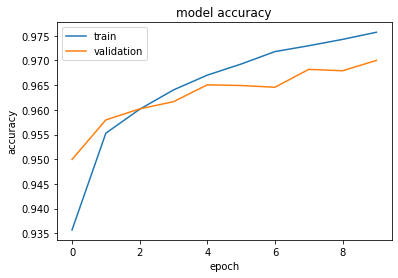

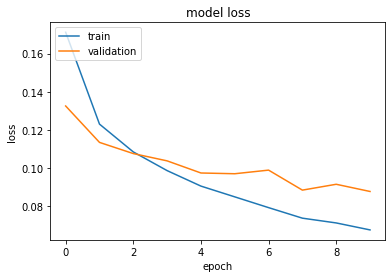

In [ ]:
print(H1.history.keys())
#  "Accuracy"
plt.plot(H1.history['accuracy'])
plt.plot(H1.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()
# "Loss"
plt.plot(H1.history['loss'])
plt.plot(H1.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

In [ ]:
model = tf.keras.models.load_model('/content/drive/Shared drives/<path_to_best_weights>')


In [ ]:
for layer in model.layers:
  if isinstance(layer, BatchNormalization):
    pass
  else:
    layer.trainable = True
opt = Adam(lr=1e-5, decay=1e-5 / 10)
model.compile(loss="binary_crossentropy", optimizer=opt,
	metrics=["accuracy"])

In [ ]:
filepath="/content/drive/<path_to_weigts_folder>"
checkpoint = tf.keras.callbacks.ModelCheckpoint(filepath=filepath, monitor='val_loss',verbose=1, save_best_only=True,mode='min')
callbacks_list = [checkpoint]
H2 = model.fit(train_generator,validation_data=test_generator, epochs=10, callbacks=callbacks_list)

In [ ]:
from tensorflow.keras.models import load_model
model = load_model('/content/drive/<best_weights>')

In [ ]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
from sklearn.metrics import classification_report
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import itertools

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


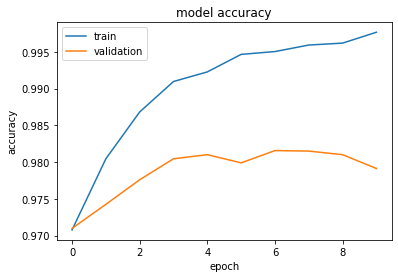

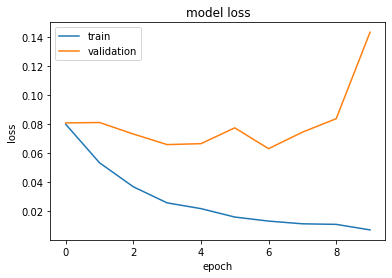

In [ ]:
print(H1.history.keys())
#  "Accuracy"
plt.plot(H2.history['accuracy'])
plt.plot(H2.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()
# "Loss"
plt.plot(H2.history['loss'])
plt.plot(H2.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
test_datagen = ImageDataGenerator()
test_dir = '/content/data/test/'
test_generator = test_datagen.flow_from_directory(
    test_dir,
    target_size=(img_width, img_height),
    batch_size=batch_size,
    class_mode='binary',
    shuffle=False)

Found 14370 images belonging to 2 classes.


In [ ]:
model.evaluate(test_generator)

450/450 [==============================] - 62s 120ms/step - loss: 0.0631 - accuracy: 0.9816


[0.06311919540166855, 0.9815587997436523]

In [ ]:
predictions = model.predict(test_generator)
y_pred = predictions > 0.5

In [ ]:
from tensorflow.keras.models import load_model

In [ ]:
def pretty_print_conf_matrix(y_true, y_pred, 
                             classes,
                             normalize=False,
                             title='Confusion matrix',
                             cmap=plt.cm.Blues):

    cm = confusion_matrix(y_true, y_pred)

    # Configure Confusion Matrix Plot Aesthetics (no text yet) 
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title, fontsize=14)
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)
    plt.ylabel('True label', fontsize=12)
    plt.xlabel('Predicted label', fontsize=12)

    # Calculate normalized values (so all cells sum to 1) if desired
    if normalize:
        cm = np.round(cm.astype('float') / cm.sum(),2) #(axis=1)[:, np.newaxis]

    # Place Numbers as Text on Confusion Matrix Plot
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black",
                 fontsize=12)



    plt.tight_layout()


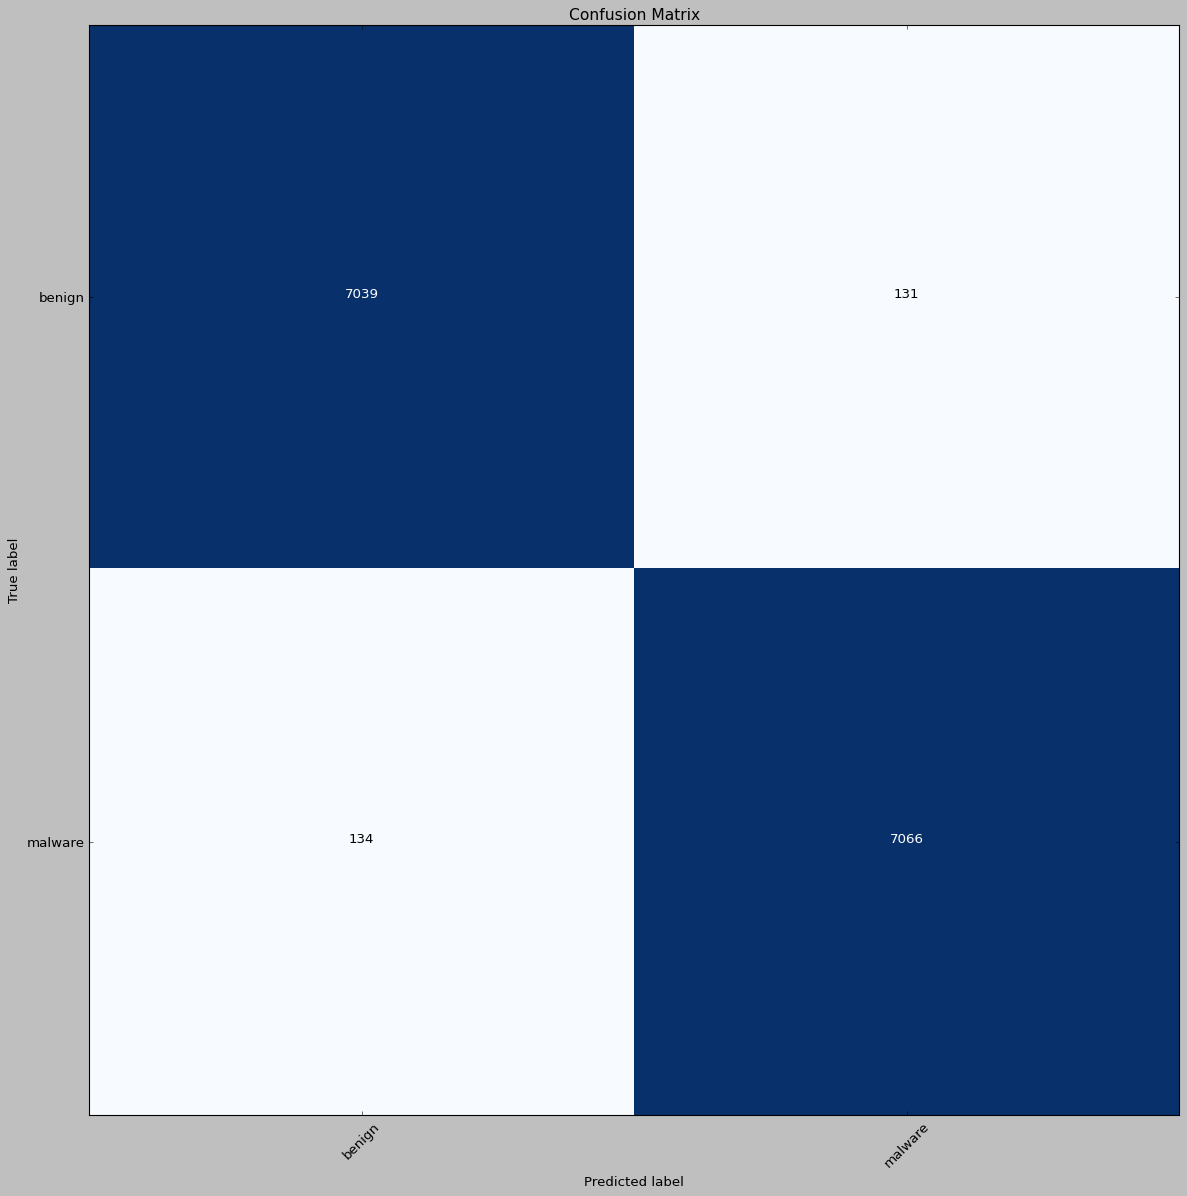

In [ ]:
plt.style.use('classic')
plt.figure(figsize=(15,15))
pretty_print_conf_matrix(test_generator.classes, y_pred, classes= ['benign','malware'], normalize=False, title='Confusion Matrix')

In [ ]:
auc = roc_auc_score(test_generator.classes, y_pred)
print(auc)

0.9815591585309158


No handles with labels found to put in legend.


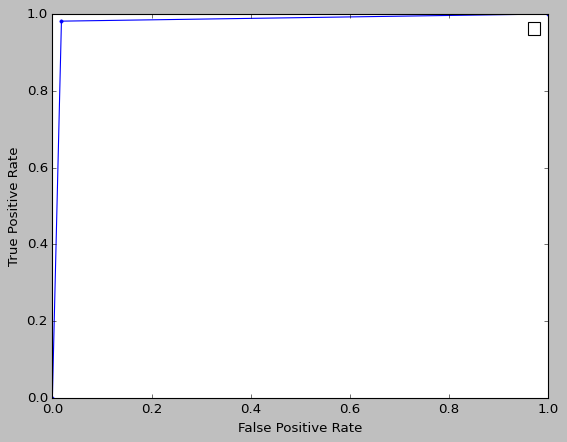

In [ ]:
lr_fpr, lr_tpr, _ = roc_curve(test_generator.classes, y_pred)
plt.plot(lr_fpr, lr_tpr, marker='.')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend()
plt.show()

In [ ]:
rpt = classification_report(test_generator.classes, y_pred)
print(rpt)

              precision    recall  f1-score   support

           0       0.98      0.98      0.98      7170
           1       0.98      0.98      0.98      7200

    accuracy                           0.98     14370
   macro avg       0.98      0.98      0.98     14370
weighted avg       0.98      0.98      0.98     14370



In [ ]:
model.save('path_to_weights')